Time (s),pip2(head~U),pip2(head~P),ap2(m2muh),ap2(sy),kin(ap),kin(pi),syn(ap),syn(pi),pip2(head~P!1).ap2(m2muh!1),kin(pi!1).pip2(head~U!1),kin(ap!1).ap2(sy!1),syn(pi!1).pip2(head~P!1),syn(ap!1).ap2(sy!1)

In [11]:
import numpy as np 
import matplotlib as plt 
import pandas as pd
import seaborn as sns

In [2]:
file = open('copy_numbers_time.dat', 'r')

count = 0
for line in file:
    linesplit = line.split(',')
    if count == 0:
        copynumbers = {k:0 for k in linesplit}
    break 





In [3]:
copynumbers

{'Time (s)': 0,
 'pip2(head~U)': 0,
 'pip2(head~P)': 0,
 'ap2(m2muh)': 0,
 'ap2(sy)': 0,
 'kin(ap)': 0,
 'kin(pi)': 0,
 'syn(ap)': 0,
 'syn(pi)': 0,
 'pip2(head~P!1).ap2(m2muh!1)': 0,
 'kin(pi!1).pip2(head~U!1)': 0,
 'kin(ap!1).ap2(sy!1)': 0,
 'syn(pi!1).pip2(head~P!1)': 0,
 'syn(ap!1).ap2(sy!1)\n': 0}

In [33]:
df = pd.read_csv('copy_numbers_time.dat')

df

,Time (s),pip2(head~U),pip2(head~P),ap2(m2muh),ap2(sy),kin(ap),kin(pi),syn(ap),syn(pi),pip2(head~P!1).ap2(m2muh!1),kin(pi!1).pip2(head~U!1),kin(ap!1).ap2(sy!1),syn(pi!1).pip2(head~P!1),syn(ap!1).ap2(sy!1)
0,0.000000,4897,0,569,569,100,100,100,100,0,0,0,0,0
1,0.000005,4897,0,569,569,100,100,100,100,0,0,0,0,0
2,0.000010,4897,0,569,569,100,100,100,100,0,0,0,0,0
3,0.000015,4897,0,569,569,100,100,100,100,0,0,0,0,0
4,0.000020,4897,0,569,568,99,100,100,100,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0.099980,4746,121,542,537,70,97,98,100,27,3,30,0,2
19997,0.099985,4746,121,542,537,70,97,98,100,27,3,30,0,2
19998,0.099990,4746,121,542,537,70,97,98,100,27,3,30,0,2
19999,0.099995,4746,121,542,537,70,97,98,100,27,3,30,0,2


<AxesSubplot:xlabel='Time (s)'>

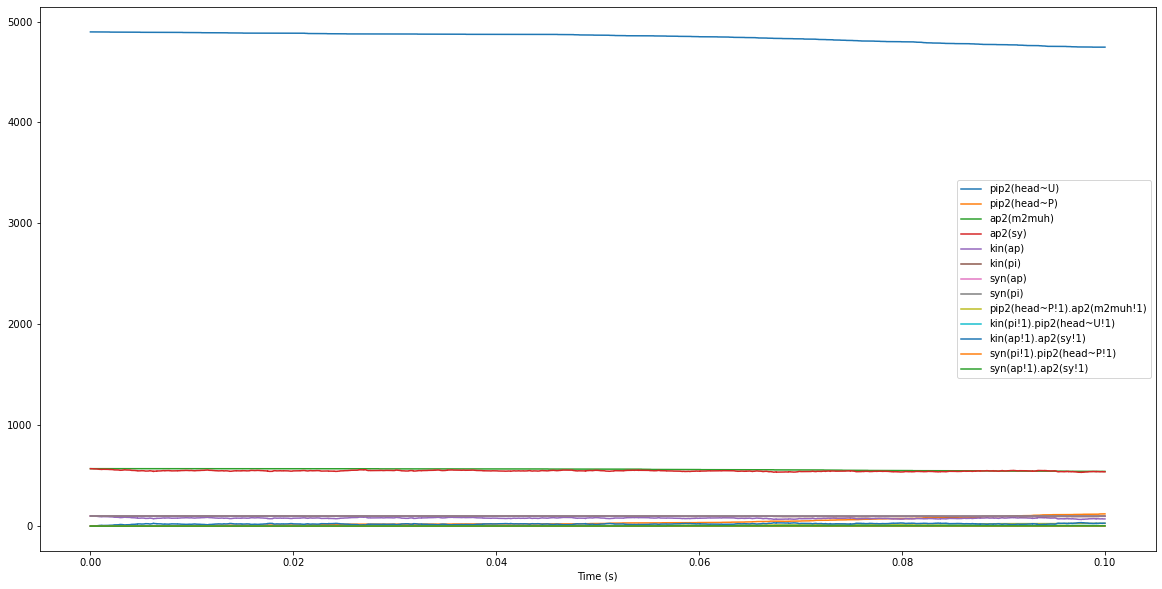

In [13]:
df.plot.line(x='Time (s)', figsize=(20,10))

In [42]:
def concentration(copies, V):

    moles = copies/6.023e17 #converts copies to micromoles
    V = V/1e15 #convert volume in um^-3 to liters
    conc = moles/V #divide micromoles by volume
    
    return conc


In [46]:
def df_pretty(df, V):
    newdf = pd.DataFrame()
    newdf['Time (us)'] = df['Time (s)'].apply(lambda x: x*1e6)
    newdf['PIP'] = df.iloc[:,1].apply(lambda copies: concentration(copies, V))
    newdf['PIP2'] = df.iloc[:,2].apply(lambda copies: concentration(copies, V))
    #newdf['A'] = df.iloc[:,3].apply(lambda copies: concentration(copies, V))
    newdf['A'] = (df['ap2(m2muh)'][0] - df.iloc[:,9] - df.iloc[:,11] - df.iloc[:,13])
    newdf['A'] = newdf['A'].apply(lambda copies: concentration(copies, V))
    

    return newdf 


In [54]:
test = (df['ap2(m2muh)'][0] - df.iloc[:,9] - df.iloc[:,11] - df.iloc[:,13])
test

0        569
1        569
2        569
3        569
4        568
        ... 
19996    510
19997    510
19998    510
19999    510
20000    511
Length: 20001, dtype: int64

In [47]:
newdf = df_pretty(df, 0.15)

In [49]:
newdf

,Time (us),PIP
0,0.0,54.203332
1,5.0,54.203332
2,10.0,54.203332
3,15.0,54.203332
4,20.0,54.203332
...,...,...
19996,99980.0,52.531961
19997,99985.0,52.531961
19998,99990.0,52.531961
19999,99995.0,52.531961


In [15]:
df.iloc[:,0]

0        0.000000
1        0.000005
2        0.000010
3        0.000015
4        0.000020
           ...   
19996    0.099980
19997    0.099985
19998    0.099990
19999    0.099995
20000    0.100000
Name: Time (s), Length: 20001, dtype: float64

In [16]:
df['Time (s)']

0        0.000000
1        0.000005
2        0.000010
3        0.000015
4        0.000020
           ...   
19996    0.099980
19997    0.099985
19998    0.099990
19999    0.099995
20000    0.100000
Name: Time (s), Length: 20001, dtype: float64